# DATA EXPLORATION

## IMPORTING LIBRARIES AND DATA FILE

In [4]:
#Importing Libraries (Ones required for Preprocessing only)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OneHotEncoder
print("Libraries Imported!")

Libraries Imported!


In [5]:
#Reading the file into a Variable
data = pd.read_csv("Fraud.csv")
print("Data File has been Loaded.")

Data File has been Loaded.


## CHECKING DATA CHARACTERISTICS

In [7]:
#Checking shape of data set (rows x cols)

print("The rows and columns in the data are:",data.shape)

The rows and columns in the data are: (6362620, 11)


In [8]:
#Checking the datatypes of variables
print("Variable Data Types:\n\n{}".format(data.dtypes))

Variable Data Types:

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


Note: datatype 'Object' denotes variable might be a string.
For using Machine Learning techniques, we try to convert Categorical variables to numbers using "Encoding" through One-Hot Encoder class.

In [9]:
#Renaming Columns for our convenience
data=data.rename(columns={"step": "hour_inst","nameDest":"destName","nameOrig":"origName", "oldbalanceOrg": "orig_oldBal","newbalanceOrig": "orig_newBal",
                   "oldbalanceDest":"dest_oldBal","newbalanceDest":"dest_newBal"})

### STATISTICAL SUMMARIES

In [6]:
#Preliminary Statiscal Analysis to check min, max, mean
data.describe()

,hour_inst,amount,orig_oldBal,orig_newBal,dest_oldBal,dest_newBal,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


The mean as well as 75the percentile for "isFraud" and "isFlaggedFraud" <<1, or approximately.
This leads us to suspect that the majority class in False for "isFraud" and "isFlaggedFraud" but, our class of interest is  "isFraud" and "isFlaggedFraud" as True i.e. 1 for these.

Thus, we checked for "Class Imbalance" for the dataset.

In [7]:
#Checking the top 15 rows
data.head(10)

,hour_inst,type,amount,origName,orig_oldBal,orig_newBal,destName,dest_oldBal,dest_newBal,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


### NOTE ON TRANSACTION VALIDITY

In [8]:
print("""Notice that for first row although there is change in Origin balance, Destination balance shows no change. 

This is not an anomaly, it is possible as some transactions may not be completed instantaneously.

Hence, initially, we do not reduce dimensionality by removing such transactions.
""")

Notice that for first row although there is change in Origin balance, Destination balance shows no change. 

This is not an anomaly, it is possible as some transactions may not be completed instantaneously.

Hence, initially, we do not reduce dimensionality by removing such transactions.



But, we can check  New/Old Balance for Dest for Fraud Transactions:

# DATA EXPLORATION AND VISUALIZATION

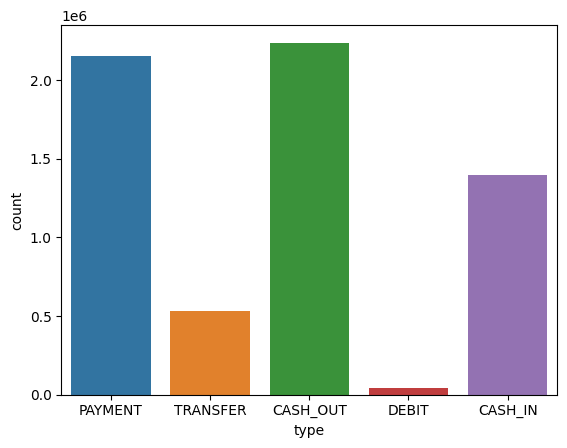

In [11]:
ax=sns.countplot(data=data,x="type")

In [23]:
countby_type = data.groupby('isFraud').size()
isFraud_countpercent=round(countby_type / len(data) * 100,2)
print("The Total isFraud instances are:\n{}".format(countby_type))
print("\nThe Total isFraud instances are:\n{}".format(isFraud_countpercent))

The Total isFraud instances are:
isFraud
0    6354407
1       8213
dtype: int64

The Total isFraud instances are:
isFraud
0    99.87
1     0.13
dtype: float64


[Text(0, 0, '0'),
 Text(0, 0, '4097'),
 Text(0, 0, '4116'),
 Text(0, 0, '0'),
 Text(0, 0, '0')]

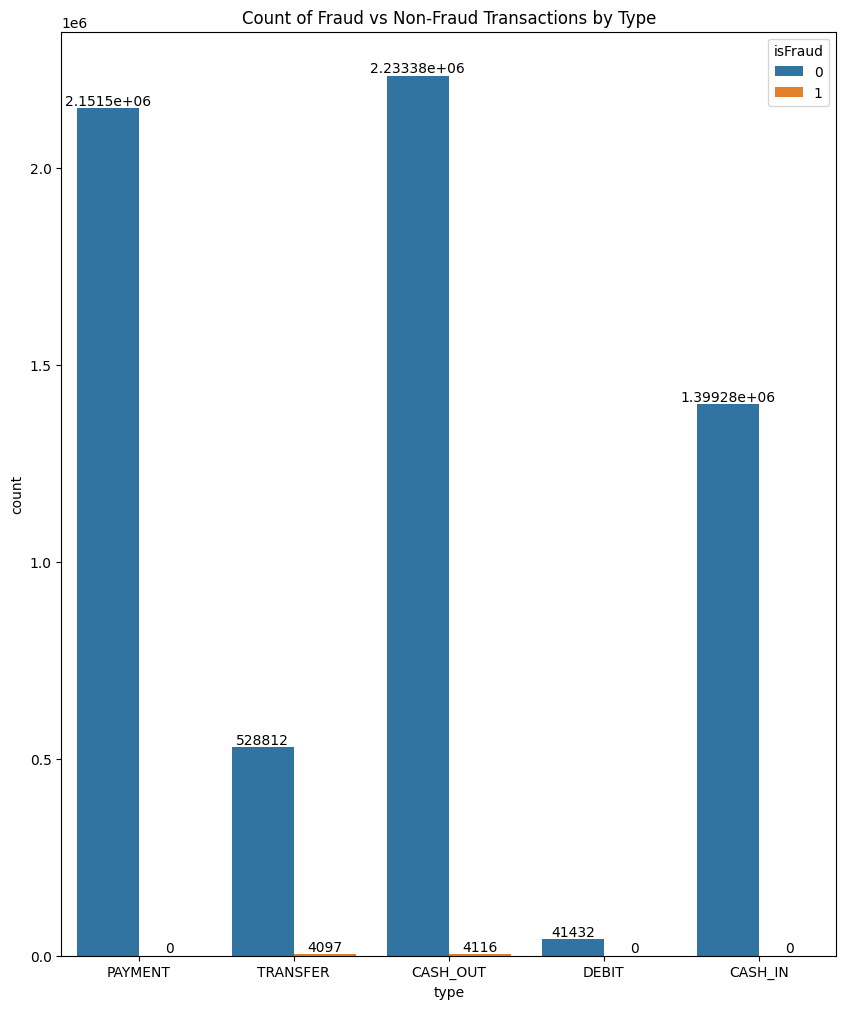

In [17]:
#Plot
plt.figure(figsize=(10, 12))
a1=sns.countplot(x='type',data=data, hue="isFraud")
a1.title.set_text("Count of Fraud vs Non-Fraud Transactions by Type")
a1.bar_label(a1.containers[0])
a1.bar_label(a1.containers[1])

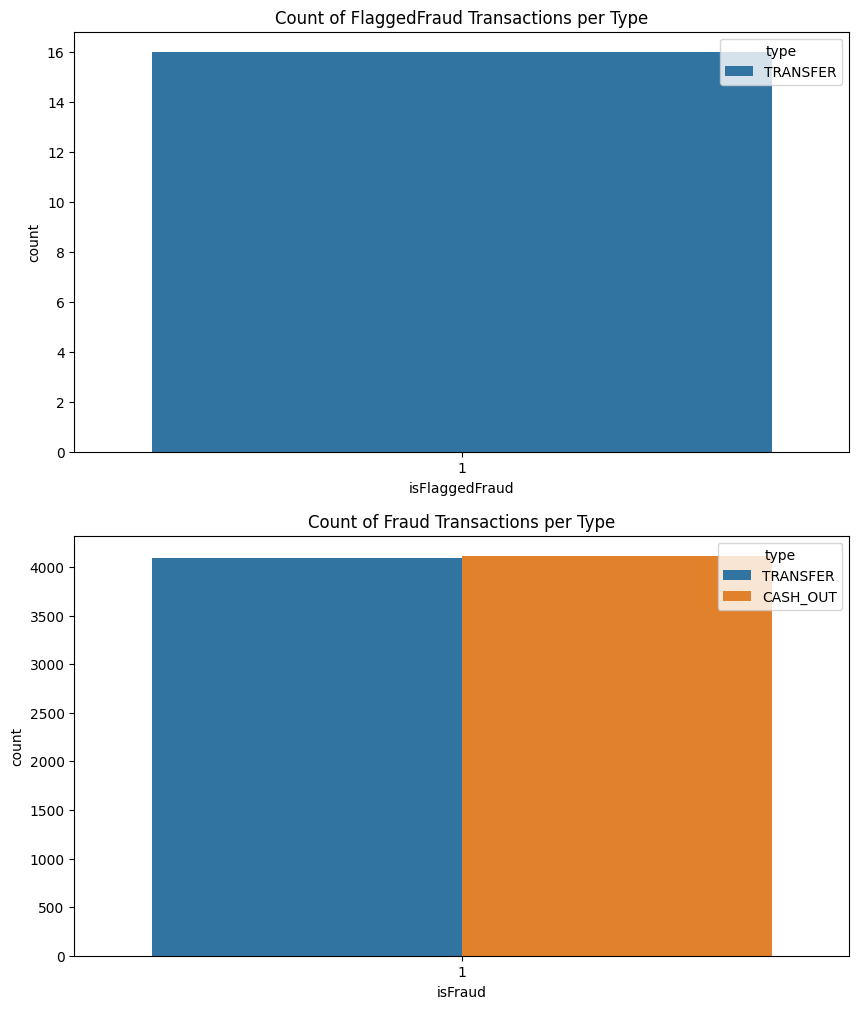

In [13]:
#Counting Fraud and FlaggedFraud transactions by Type
plt.figure(figsize=(10, 12))
a1 = plt.subplot(212)
a2 = plt.subplot(211)
axes = [a1, a2]

Fraud=data.loc[data['isFraud']==1]
a1=sns.countplot(data=Fraud,x="isFraud", hue="type",ax=axes[0])
a1.title.set_text("Count of Fraud Transactions per Type")

FlaggedFraud=data.loc[data['isFlaggedFraud']==1]
a2=sns.countplot(data=FlaggedFraud,x="isFlaggedFraud", hue="type")
a2.title.set_text("Count of FlaggedFraud Transactions per Type")

### CHECKING ONLY DEST DIFFERENCE TO INFER FRAUD 

In [9]:
data["destDifference"] = data["dest_oldBal"]-data["dest_newBal"]
data

,hour_inst,type,amount,origName,orig_oldBal,orig_newBal,destName,dest_oldBal,dest_newBal,isFraud,isFlaggedFraud,destDifference
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0.00
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0.00
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,21182.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,-339682.13
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0.00
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,-6311409.27
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0.00


C:\Users\Komal\AppData\Local\Temp\ipykernel_6756\3334183889.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t_less0=len(data[data["isFraud"]==1][data["destDifference"]<0])
C:\Users\Komal\AppData\Local\Temp\ipykernel_6756\3334183889.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t_equal0=len(data[data["isFraud"]==1][data["destDifference"]==0])
C:\Users\Komal\AppData\Local\Temp\ipykernel_6756\3334183889.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t_more0=len(data[data["isFraud"]==1][data["destDifference"]>0])


<Axes: title={'center': 'Count of Balance Difference at Destination'}, ylabel='Count by Conditions'>

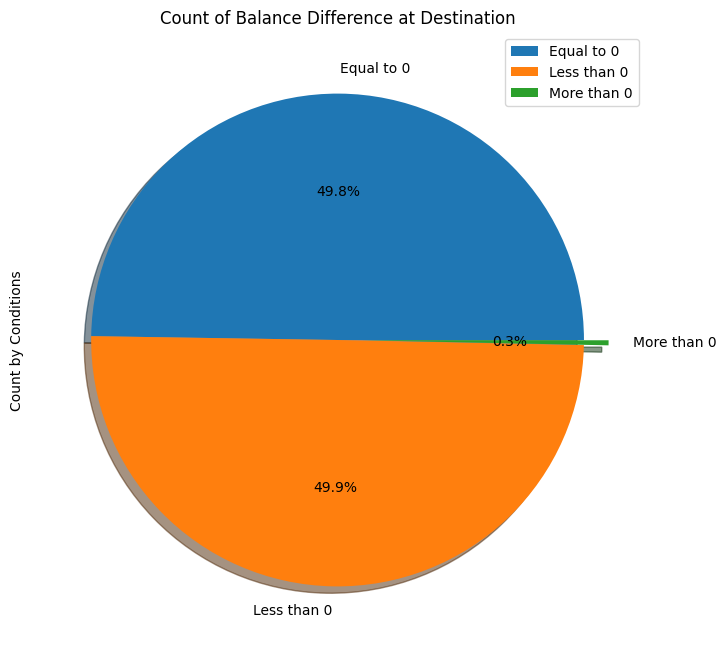

In [21]:
t_less0=len(data[data["isFraud"]==1][data["destDifference"]<0])
t_equal0=len(data[data["isFraud"]==1][data["destDifference"]==0])
t_more0=len(data[data["isFraud"]==1][data["destDifference"]>0])
pie=pd.DataFrame({"Count by Conditions":{"Less than 0":t_less0,"Equal to 0":t_equal0,"More than 0":t_more0}})
pie.plot.pie(y="Count by Conditions",title="Count of Balance Difference at Destination",figsize=(8,8),autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)

### EXPLORING C v/s M CLASS FOR isFraud TRANSACTIONS 

In [21]:
data[data["isFraud"]==1]["origName"].str[:1]

array(['C'], dtype=object)

In [22]:
data["origName_alph"],data["destName_alph"]=data["origName"].str[:1],data["destName"].str[:1]
data

,hour_inst,type,amount,origName,orig_oldBal,orig_newBal,destName,dest_oldBal,dest_newBal,isFraud,isFlaggedFraud,origName_alph,destName_alph
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,C,M
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,C,M
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,C,C
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,C,C
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,C,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,C,C
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,C,C
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,C,C
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,C,C


In [47]:
data["destName_alph_cpy"]=data["destName_alph"]

In [49]:
pd.pivot_table(data[["isFraud","destName_alph_cpy","destName_alph","origName_alph"]],index=["isFraud"],columns="destName_alph_cpy",values=["origName_alph","destName_alph"],aggfunc="count",fill_value=0)

destName_alph          origName_alph         
destName_alph_cpy             C        M             C        M
isFraud                                                        
0                       4202912  2151495       4202912  2151495
1                          8213        0          8213        0

For all the Fraud Transactions, none of them were committed by the Merchant class.

### EXPLORING GROUP-WISE STATISTICS

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


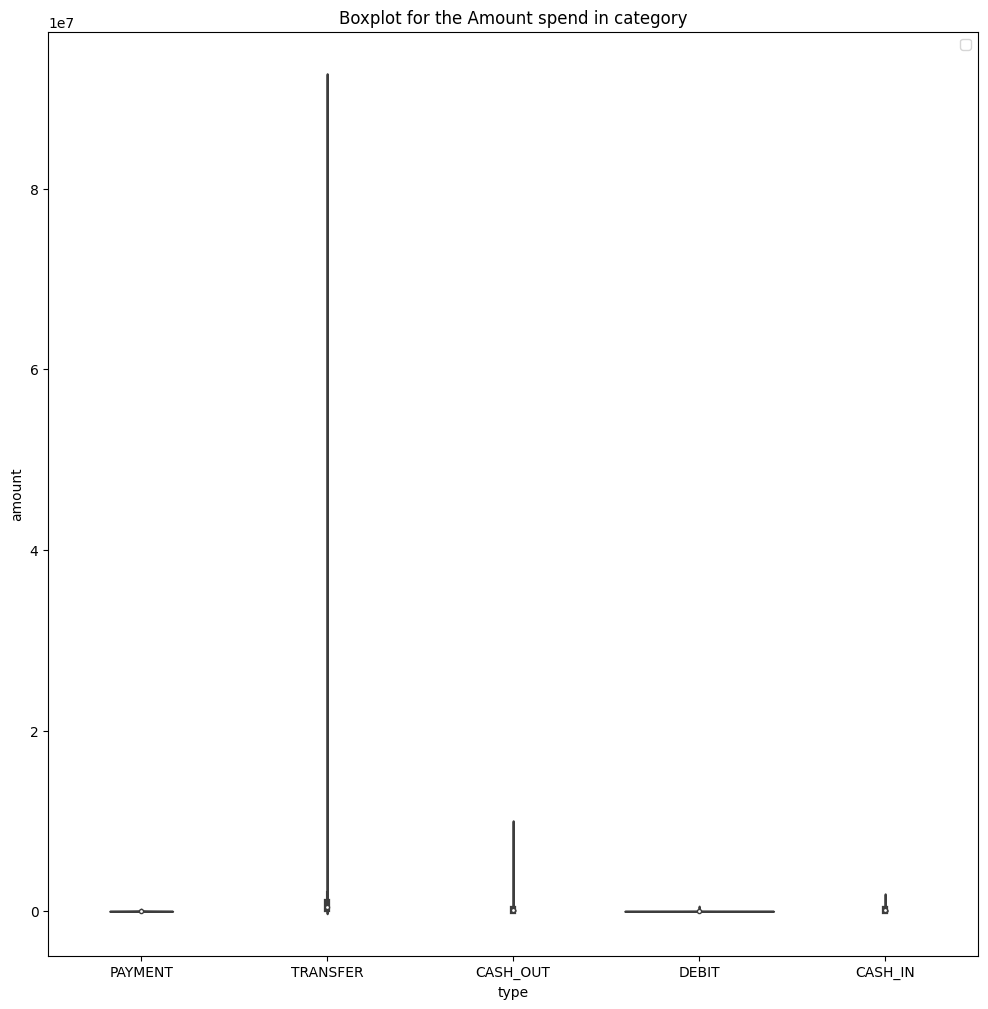

In [53]:
plt.figure(figsize=(12,12))
sns.violinplot(x=data["type"],y=data["amount"])
plt.title("Boxplot for the Amount spend in category")
plt.legend()
plt.show()

From the violinplot, we can see there are a lot of outliers with very high transactions amounts for "Transfer" and "CashOut", which also happen to be the only classes with Fraud Transactions.

type
CASH_IN     168920.242004
CASH_OUT    176273.964346
DEBIT         5483.665314
PAYMENT      13057.604660
TRANSFER    910647.009645
Name: amount, dtype: float64


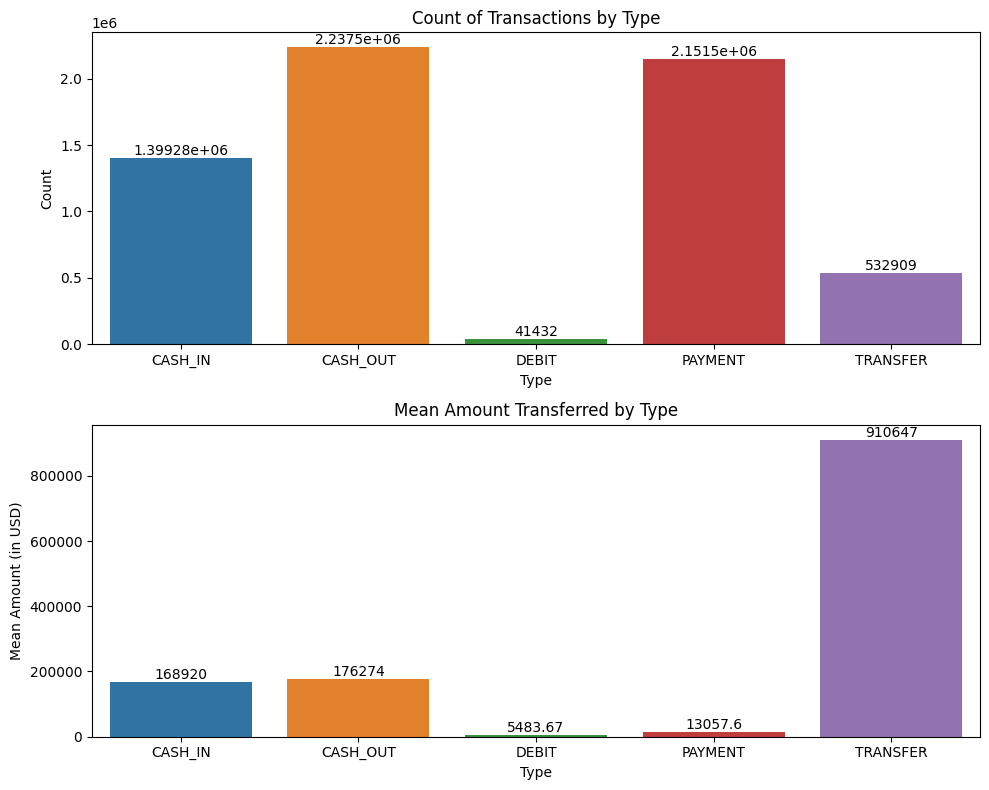

In [18]:
# Group the data by 'type' and calculate the count of each type
countby_type = data.groupby('type').size()

# Group the data by 'type' and calculate the mean amount for each type
meanAmountby_type = data.groupby('type')['amount'].mean()
print(meanAmountby_type)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the count of each type
sns.barplot(x=countby_type.index, y=countby_type.values, ax=ax1)
ax1.set_xlabel('Type')
ax1.set_ylabel('Count')
ax1.set_title('Count of Transactions by Type')
ax1.bar_label(ax1.containers[0])


# Plot the mean amount for each type
sns.barplot(x=meanAmountby_type.index, y=meanAmountby_type.values, ax=ax2)
ax2.set_xlabel('Type')
ax2.set_ylabel('Mean Amount (in USD)')
ax2.set_title('Mean Amount Transferred by Type')
ax2.bar_label(ax2.containers[0])


# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### COMPLETE SUBGROUPED STATISTICS

In [15]:
fraud_stat = data[data['isFraud'] == 1]['amount']
fraud_count = fraud_stat.count()
fraud_percentage = (fraud_count / len(data) * 100)
fraud_min_amount = fraud_stat.min()
fraud_max_amount = fraud_stat.max()
fraud_avg_amount = fraud_stat.mean()

nonfraud_stat = data[data['isFraud'] == 0]['amount']
nonfraud_count = nonfraud_stat.count()
nonfraud_percentage = (nonfraud_count / len(data) * 100)
nonfraud_min_amount = nonfraud_stat.min()
nonfraud_max_amount = nonfraud_stat.max()
nonfraud_avg_amount = nonfraud_stat.mean()

flaggedFraud_stat = data[data['isFlaggedFraud'] == 1]['amount']
fraudFlagged_count = len(data[(data['isFraud'] == 1) & (data['isFlaggedFraud'] == 1)])
fraudFlagged_percentage = (fraudFlagged_count / len(data) * 100)
fraudFlagged_min_amount = flaggedFraud_stat.min()
fraudFlagged_max_amount = flaggedFraud_stat.max()
fraudFlagged_avg_amount = flaggedFraud_stat.mean()

print("Fraudulent Transactions:")
print("Count:", fraud_count)
print("Percentage of Data: {:.4f}%".format(fraud_percentage))
print("Minimum Dollar Amount:", fraud_min_amount)
print("Maximum Dollar Amount:", fraud_max_amount)
print("Average Dollar Amount:", fraud_avg_amount)
print()

print("Non-Fraudulent Transactions:")
print("Count:", nonfraud_count)
print("Percentage of Data: {:.4f}%".format(nonfraud_percentage))
print("Minimum Dollar Amount:", nonfraud_min_amount)
print("Maximum Dollar Amount:", nonfraud_max_amount)
print("Average Dollar Amount:", nonfraud_avg_amount)
print()

print("Flagged Fraudulent Transactions:")
print("Count:", fraudFlagged_count)
print("Percentage of Data: {:.4f}%".format(fraudFlagged_percentage))
print("Minimum Dollar Amount:", fraudFlagged_min_amount)
print("Maximum Dollar Amount:", fraudFlagged_max_amount)
print("Average Dollar Amount:", fraudFlagged_avg_amount)
print()

print("Count where isFraud and isFlaggedFraud are both true:", fraudFlagged_count)

Fraudulent Transactions:
Count: 8213
Percentage of Data: 0.1291%
Minimum Dollar Amount: 0.0
Maximum Dollar Amount: 10000000.0
Average Dollar Amount: 1467967.299140387

Non-Fraudulent Transactions:
Count: 6354407
Percentage of Data: 99.8709%
Minimum Dollar Amount: 0.01
Maximum Dollar Amount: 92445516.64
Average Dollar Amount: 178197.04172740763

Flagged Fraudulent Transactions:
Count: 16
Percentage of Data: 0.0003%
Minimum Dollar Amount: 353874.22
Maximum Dollar Amount: 10000000.0
Average Dollar Amount: 4861597.730625

Count where isFraud and isFlaggedFraud are both true: 16


In [16]:
#Grouping and Calculations
isFraud_percent=round(data.groupby('isFraud').type.value_counts() / len(data) * 100,2)
print("The Fraudulent Transactions in percentage by Type are:\n{}".format(isFraud_percent))

The Fraudulent Transactions in percentage by Type are:
isFraud  type    
0        CASH_OUT    35.10
         PAYMENT     33.81
         CASH_IN     21.99
         TRANSFER     8.31
         DEBIT        0.65
1        CASH_OUT     0.06
         TRANSFER     0.06
Name: count, dtype: float64


It Can be seen that the Mean for Transfer is high, which makes it prone to Fraudulent activity as seen above.

Text(0, 0.5, 'Amount (in 10000000 USD)')

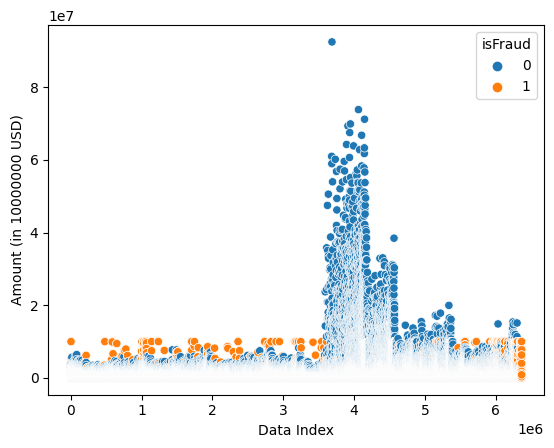

In [75]:
#Scatter plot 
scatter_reduce=data.loc[:,["amount","isFraud"]]
sc=sns.scatterplot(data=scatter_reduce, x=scatter_reduce.index, y="amount", hue="isFraud")
sc.set_xlabel('Data Index')
sc.set_ylabel('Amount (in 10000000 USD)')

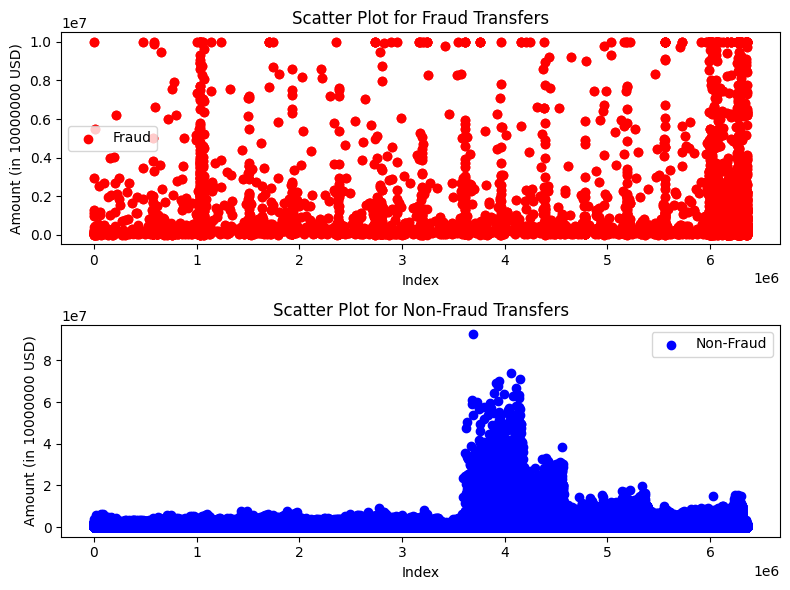

In [76]:
# Separated Scatter plot
isFraudCol = data[data['isFraud'] == 1]
nonFraudCol = data[data['isFraud'] == 0]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Scatter plot for Fraud data
ax1.scatter(isFraudCol.index, isFraudCol['amount'], color='red', label='Fraud')
ax1.set_xlabel('Index')
ax1.set_ylabel('Amount (in 10000000 USD)')
ax1.set_title('Scatter Plot for Fraud Transfers')
ax1.legend()

# Scatter plot for Non-Fraud data
ax2.scatter(nonFraudCol.index, nonFraudCol['amount'], color='blue', label='Non-Fraud')
ax2.set_xlabel('Index')
ax2.set_ylabel('Amount (in 10000000 USD)')
ax2.set_title('Scatter Plot for Non-Fraud Transfers')
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

### HEAT MAP FOR CORRELATIONS AMONG THE VARIABLES

<Axes: >

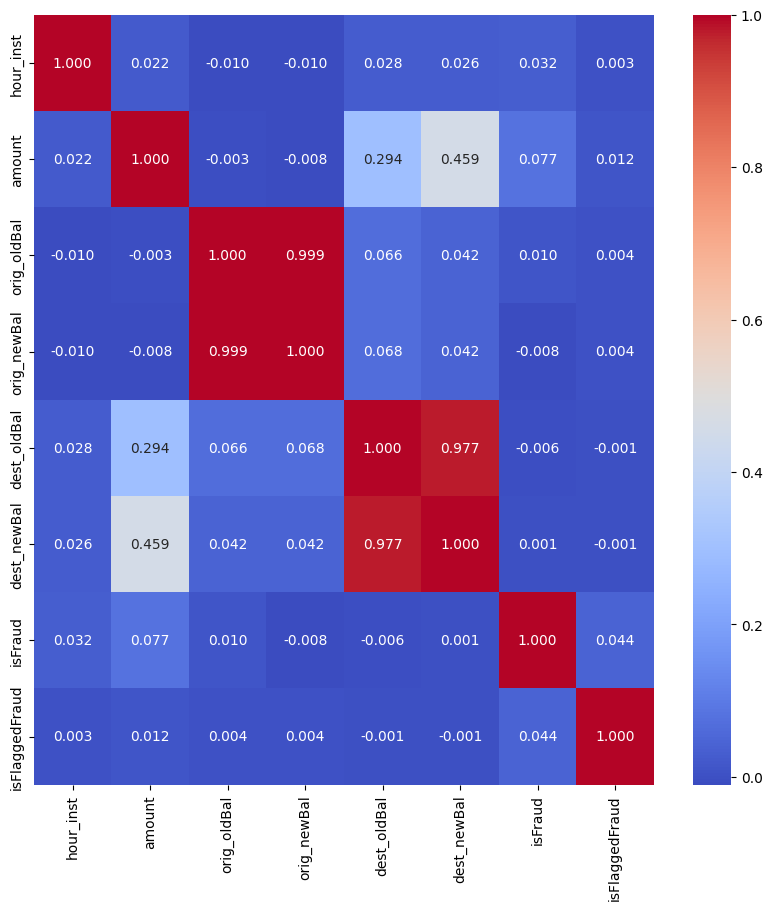

In [38]:
#SNS Heatmap before Data Processing
corr_Mat1 = data[['hour_inst',
 'amount',
 'orig_oldBal',
 'orig_newBal',
 'dest_oldBal',
 'dest_newBal',
 'isFraud',
 'isFlaggedFraud']].corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_Mat1, cmap="coolwarm",annot=True, fmt=".3f")

## AFTER STANDARDIZATION AND OVERSAMPLING WITH SMOTE

In [54]:
data_smt=pd.read_csv("data_smt.csv")
data_smt

,Unnamed: 0,hour_inst,0,amt_std,orig_oldBal_std,dest_newBal_std,isFlaggedFraud,origName_num,destName_num,isFraud
0,0,1,0.000000,-0.357467,-0.188847,-0.438259,0,1.305486e+09,5.532641e+08,1
1,1,1,1.000000,-0.357467,-0.188847,-0.438259,0,8.400837e+08,3.899701e+07,1
2,2,1,1.000000,-0.099576,-0.128591,-0.427245,0,9.050804e+08,4.764022e+08,0
3,3,1,0.000000,-0.115146,-0.186762,-0.438259,0,1.670993e+09,1.100439e+09,0
4,4,1,0.000000,-0.006590,-0.146456,0.143134,0,1.984094e+09,9.325838e+08,0
...,...,...,...,...,...,...,...,...,...,...
5524387,5524387,21,1.000000,2.209439,8.878579,0.194944,0,1.674460e+09,5.521628e+08,1
5524388,5524388,21,0.784301,0.132743,1.542788,-0.356129,0,4.773347e+08,7.193603e+08,1
5524389,5524389,15,0.423610,-0.122661,0.640589,-0.396796,0,6.350794e+08,1.282578e+09,1
5524390,5524390,19,0.049081,1.737213,7.210472,-0.436633,0,1.501832e+09,3.719206e+07,1


In [30]:
data_smt.columns.tolist()

['Unnamed: 0',
 'hour_inst',
 '0',
 'amt_std',
 'orig_oldBal_std',
 'dest_newBal_std',
 'isFlaggedFraud',
 'origName_num',
 'destName_num',
 'isFraud']

<Axes: >

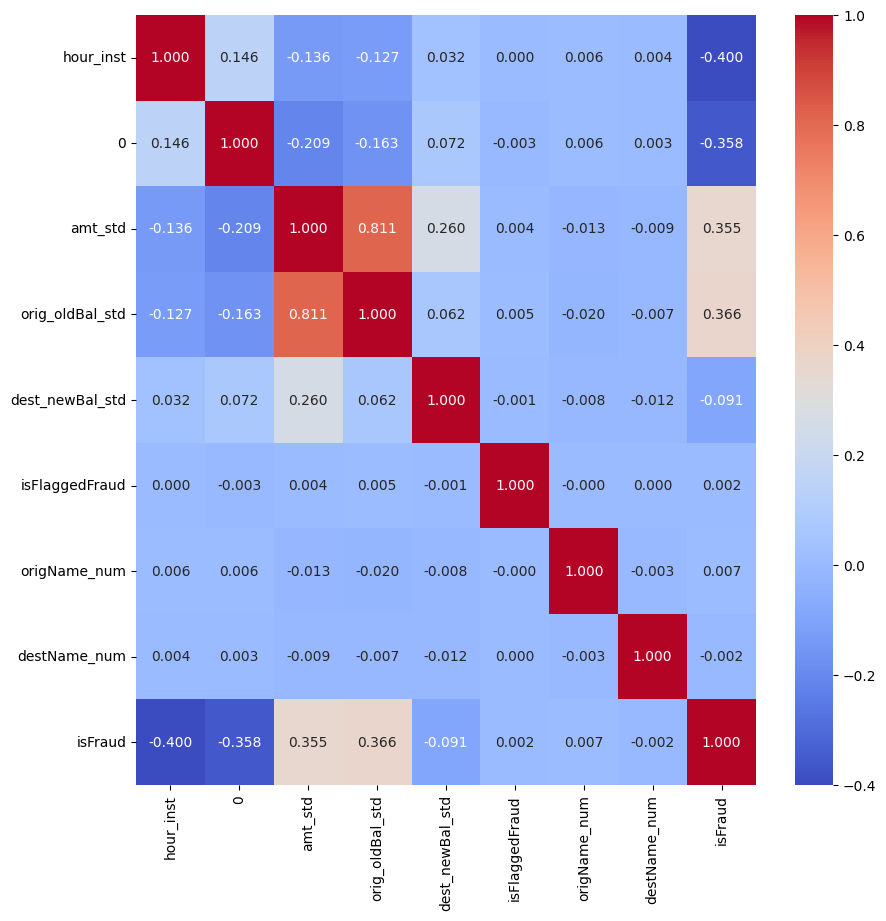

In [37]:
#SNS Heatmap
corr_Mat2 = data_smt[['hour_inst',
 '0',
 'amt_std',
 'orig_oldBal_std',
 'dest_newBal_std',
 'isFlaggedFraud',
 'origName_num',
 'destName_num',
 'isFraud']].corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_Mat2, cmap="coolwarm",annot=True, fmt=".3f")

### CLASS-WISE COMPARISON: BEFORE VS AFTER OVERSAMPLING

In [55]:
#NOT OVERSAMPLED DATA
data_NoOversample=pd.read_csv(r"C:\Users\Komal\Documents\venv_\data_clean_std.csv")
data_NoOversample

,Unnamed: 0,hour_inst,0,isFraud,amt_std,orig_oldBal_std,dest_newBal_std,isFlaggedFraud,origName_num,destName_num
0,2,1,0.0,1,-0.357467,-0.188847,-0.438259,0,1305486145,553264065
1,3,1,1.0,1,-0.357467,-0.188847,-0.438259,0,840083671,38997010
2,15,1,1.0,0,-0.099576,-0.128591,-0.427245,0,905080434,476402209
3,19,1,0.0,0,-0.115146,-0.186762,-0.438259,0,1670993182,1100439041
4,24,1,0.0,0,-0.006590,-0.146456,0.143134,0,1984094095,932583850
...,...,...,...,...,...,...,...,...,...,...
2770404,6362615,23,1.0,1,0.024945,1.161997,-0.365631,0,786484425,776919290
2770405,6362616,23,0.0,1,6.751458,24.922965,-0.438259,0,1529008245,1881841831
2770406,6362617,23,1.0,1,6.751458,24.922965,0.925844,0,1162922333,1365125890
2770407,6362618,23,0.0,1,0.599766,3.192516,-0.438259,0,1685995037,2080388513


In [56]:
data_NoOversample=data_NoOversample.drop("Unnamed: 0",axis=1)
data_smt=data_smt.drop("Unnamed: 0",axis=1)

In [57]:
x_T_NO=data_NoOversample.drop(['isFlaggedFraud','hour_inst','isFraud','origName_num','destName_num'],axis=1)
y_T_NO=data_NoOversample[['isFraud']]
x_T_smt=data_smt.drop(['isFlaggedFraud','hour_inst','isFraud','origName_num','destName_num'],axis=1)
y_T_smt=data_smt[['isFraud']]

In [58]:
x_T_NO=data_NoOversample[data_NoOversample['0']==0].drop(['isFlaggedFraud','hour_inst','isFraud','origName_num','destName_num'],axis=1)
y_T_NO=data_NoOversample[data_NoOversample['0']==0][['isFraud']]
x_C_NO=data_NoOversample[data_NoOversample['0']==1].drop(['isFlaggedFraud','hour_inst','isFraud','origName_num','destName_num'],axis=1)
y_C_NO=data_NoOversample[data_NoOversample['0']==1][['isFraud']]
print("\nNon-Oversampled set:\n")
print(len(x_T_NO),len(y_T_NO))
print(len(x_C_NO),len(y_C_NO))


x_T_O=data_smt[data_smt['0']==0].drop(['isFlaggedFraud','hour_inst','isFraud','origName_num','destName_num'],axis=1)
y_T_O=data_smt[data_smt['0']==0][['isFraud']]
x_C_O=data_smt[data_smt['0']==1].drop(['isFlaggedFraud','hour_inst','isFraud','origName_num','destName_num'],axis=1)
y_C_O=data_smt[data_smt['0']==1][['isFraud']]
print("\nOversampled set:\n")
print(len(x_T_O),len(y_T_O))
print(len(x_C_O),len(y_C_O))


Non-Oversampled set:

532909 532909
2237500 2237500

Oversampled set:

1226698 1226698
2936301 2936301


In [60]:
from sklearn.decomposition import PCA

In [61]:
pca_T_NO=PCA(n_components=2)
pca_C_NO=PCA(n_components=2)
x_T_NO_trans=pca_T_NO.fit_transform(x_T_NO)
x_C_NO_trans=pca_C_NO.fit_transform(x_C_NO)

pca_T_O=PCA(n_components=2)
pca_C_O=PCA(n_components=2)
x_T_O_trans=pca_T_O.fit_transform(x_T_O)
x_C_O_trans=pca_C_O.fit_transform(x_C_O)

In [62]:
y_T_NO['Transfer_PC1']=x_T_NO_trans[:,0].tolist()
y_T_NO['Transfer_PC2']=x_T_NO_trans[:,1].tolist()
y_C_NO['Cashout_PC1']=x_C_NO_trans[:,0].tolist()
y_C_NO['Cashout_PC2']=x_C_NO_trans[:,1].tolist()

y_T_O['Transfer_PC1']=x_T_O_trans[:,0].tolist()
y_T_O['Transfer_PC2']=x_T_O_trans[:,1].tolist()
y_C_O['Cashout_PC1']=x_C_O_trans[:,0].tolist()
y_C_O['Cashout_PC2']=x_C_O_trans[:,1].tolist()

<Axes: title={'center': 'Oversampled: SMOTE'}, xlabel='Transfer_PC1', ylabel='Transfer_PC2'>

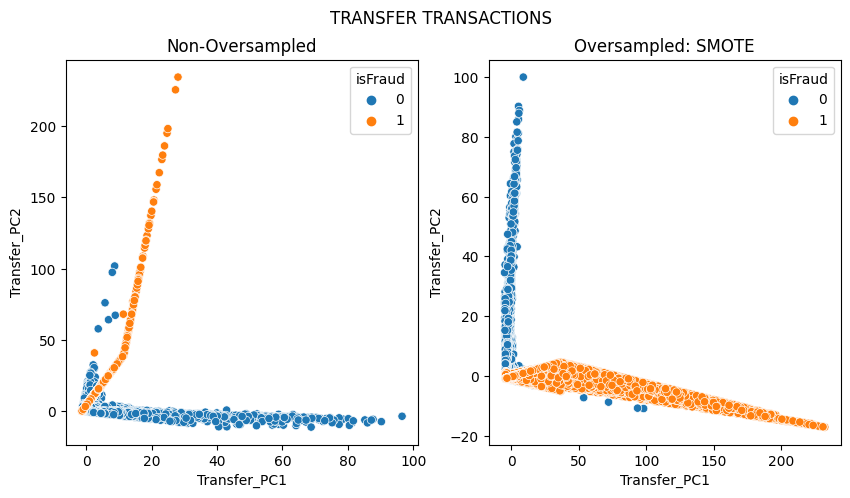

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('TRANSFER TRANSACTIONS')
axes[0].set_title('Non-Oversampled')
axes[1].set_title('Oversampled: SMOTE')
sns.scatterplot(ax=axes[0],data=y_T_NO,x=y_T_NO['Transfer_PC1'],y=y_T_NO['Transfer_PC2'],hue='isFraud')
sns.scatterplot(ax=axes[1],data=y_T_O,x=y_T_O['Transfer_PC1'],y=y_T_O['Transfer_PC2'],hue='isFraud')

<Axes: title={'center': 'Oversampled: SMOTE'}, xlabel='Cashout_PC1', ylabel='Cashout_PC2'>

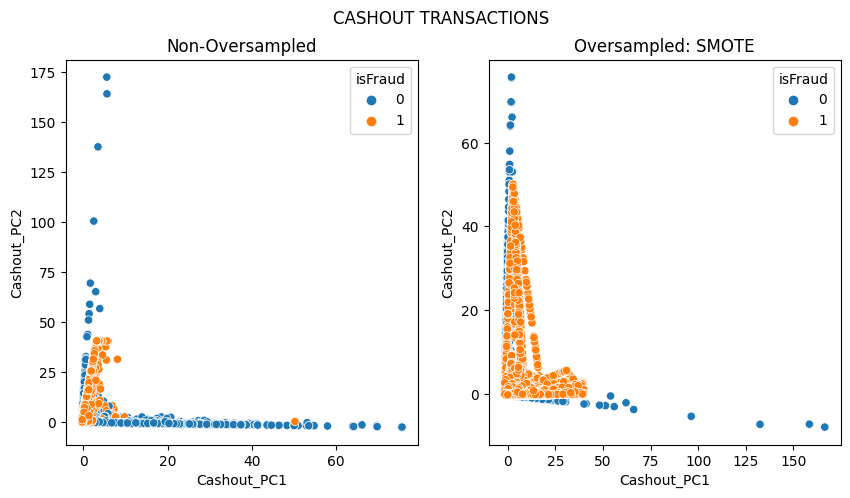

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('CASHOUT TRANSACTIONS')
axes[0].set_title('Non-Oversampled')
axes[1].set_title('Oversampled: SMOTE')
sns.scatterplot(ax=axes[0],data=y_C_NO,x=y_C_NO['Cashout_PC1'],y=y_C_NO['Cashout_PC2'],hue='isFraud')
sns.scatterplot(ax=axes[1],data=y_C_O,x=y_C_O['Cashout_PC1'],y=y_C_O['Cashout_PC2'],hue='isFraud')